In [6]:
import numpy as np

# Считываем данные из файла
data = np.genfromtxt('lottery-draws.txt', delimiter=' ', skip_header=1, usecols=(1, 2, 3, 4, 5, 6))

# Функция для определения, выиграл ли кто-то джекпот (выбрал все 6 чисел)
def has_jackpot(row):
    return np.sum(row < 13) == 0

# Фильтруем только розыгрыши, которые не привели к увеличению джекпота
filtered_data = data[data[:, 0] == 0]

# Определяем, выиграл ли кто-то джекпот в каждом розыгрыше
jackpot_wins = np.array([has_jackpot(row) for row in filtered_data])

# Количество шаров с номерами меньше 13 в каждом розыгрыше
balls_less_than_13 = np.sum(filtered_data[:, 1:] < 13, axis=1)

# Вычисляем корреляцию между количеством таких шаров и выигрышами джекпота
correlation = np.corrcoef(balls_less_than_13, jackpot_wins)[0, 1]

print("Корреляция между количеством шаров с номерами меньше 13 и выигрышами джекпота:", correlation)

Корреляция между количеством шаров с номерами меньше 13 и выигрышами джекпота: nan


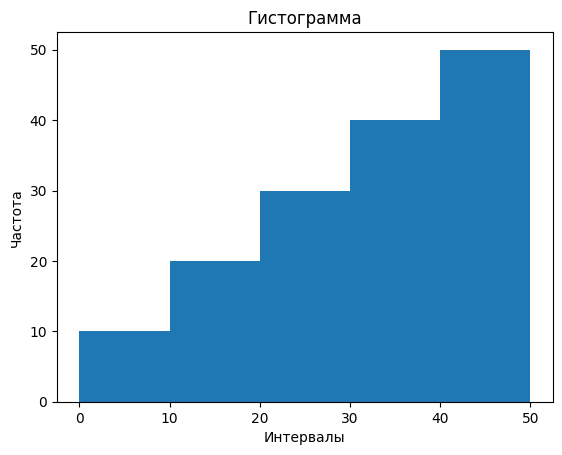

In [8]:
import matplotlib.pyplot as plt

# Ваши массивы hist и bins
hist = [10, 20, 30, 40, 50]  # Пример данных
bins = [0, 10, 20, 30, 40, 50]  # Пример интервалов

# Создаем графическое изображение гистограммы с помощью pyplot.bar
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')

# Настройка меток и заголовка
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Гистограмма')

# Отображаем график
plt.show()


Height (cm)  Female  Male
---------------------------
  135-140       0      1
  140-145       3      0
  145-150      26      2
  150-155      79      3
  155-160     183     37
  160-165     237     59
  165-170     262    115
  170-175     145    149
  175-180      52    174
  180-185      11    161
  185-190       2    137
  190-195       0     88
  195-200       0     50
  200-205       0     19
  205-210       0      5
---------------------------
Mean (cm):   164.1  178.8
 Std (cm):     7.4   10.8
---------------------------


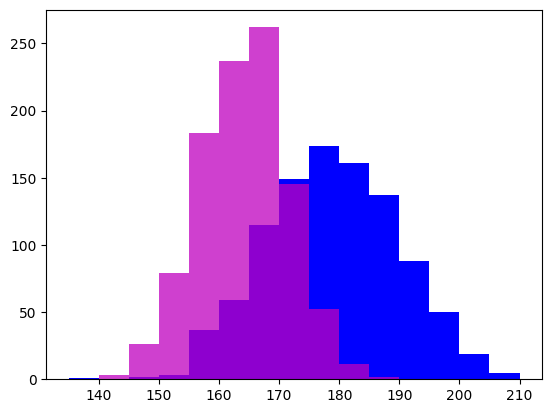

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

fsample = np.loadtxt('ex6-3-f-female-heights.txt').flatten()
msample = np.loadtxt('ex6-3-f-male-heights.txt').flatten()
heights = np.zeros((1000,), dtype={'names': ['female', 'male'],
                                   'formats': ['f8', 'f8']})
heights['female'] = np.loadtxt('ex6-3-f-female-heights.txt').flatten()
heights['male'] = np.loadtxt('ex6-3-f-male-heights.txt').flatten()
fav, fstd = heights['female'].mean(), heights['female'].std()
mav, mstd = heights['male'].mean(), heights['male'].std()
all_heights_view = heights.view((('f8', 2))).flatten()
bins = np.linspace(135, 210, 16)
mhist, _, _ = pylab.hist(heights['male'], bins, color='b')
fhist, _, _ = pylab.hist(heights['female'], bins, alpha=0.75, color='m')
print('Height (cm)  Female  Male')
print('-'*27)
for b, f, m in np.vstack((bins[:-1], fhist, mhist)).T:
    print('  {:d}-{:d}     {:3d}    {:3d}'.format(int(b), int(b)+5,
                                                   int(f), int(m)))
print('-'*27)
print('Mean (cm):   {:5.1f}  {:5.1f}'.format(fav, mav))
print(' Std (cm):   {:5.1f}  {:5.1f}'.format(fstd, mstd))
print('-'*27)
